
# Creating Adversarial Images to Fool Image Classification/Generation Models



> Fall 2023

> Lexis Sablan (lrs2217)   |  Veronica Hodapp (vth2106) | G. Ismael Perez (gip2109)






## Motivation and Objective
With the rise of generative AI, specifically those that generate 'AI Art', the integrity of artists' intellectual property is threatened. Through training, AI models learn the key features and patterns associated with an image and its label. It then uses that information to generate those features and patterns according to the user's text prompt. To achieve this companies require an extensive dataset to work on, often compiled of stolen art swept from the Internet without the artist's permission. Efforts being made to combat generative AI include applying what are called "adversarial patterns" to images that make subtle changes to the images' pixels in such a way that fools the model but remains visually the same to the human eye. In this project, we apply and test different adversarial attack methods and consider the linear algebra applications.


## Background Knowledge
### Adverse Effects of Generative AI Art
AI image generation has become very popular, even with those not in the tech sector. Its capability to create images based on textual input is highly useful in advertising, art, and recreational use. AI image generators work by receiving textual input, and outputting the corresponding image based on trained **artificial neural networks**. These artificial neural networks are computational models that imitate the biological neural networks in the human brain, comprising hundreds of thousands of interconnected processing nodes (Hardesty, 2017). These models are fed text-image pairs to train these models for when they have to generate an image when fed text input.

These generators have become available to the public such as OpenAI’s DALL-E, Google’s Inception V3, and Stability AI’s Stable Diffusion. However, the text-image pairs on which these models are trained are a point of contention in the artistic community. Hundreds of millions of images are scraped from the web to train these large models (OpenAI, 2022), and DALL-E says that these text-image “pairs were drawn from publicly available sources and sources that [DALL-E] licensed” (Mishkin et al., 2022).

Although there are filters in place to block training on violent and sexual images, which is very good, models are still able to scrape and replicate artist’s work. Using AI generative tools, an artist’s work can be replicated and used without their consent. A slew of lawsuits have been filed against many of the top AI companies for scraping artist’s work without permission. Popular fantasy artists such as Greg Rutkowski find themselves under particular attack, as their names become top searches in AI models (Heikkilä, 2022). The lack of credit and compensation artists leaves them wondering about their future, and the industry’s future (CBS News Bay Area, 2023).

### Current Efforts to Combat Generative AI
However, tools are now being created such as Nightshade, a software that alters images to combat image-generating AI models that use the image in training (Heikkilä, 2023). This is useful for artists, especially considering the many lawsuits launched against AI companies such as OpenAI and Meta who are suspected of scraping copyrighted images without consent.

Nightshade works by using “prompt-specific poisoning attacks” to break the AI model, and was proven to corrupt a “Stable Diffusion SDXL prompt in <100 poison samples,” an AI model with similar uses as DALL-E (Shan, 2023). AI models associate a concept with an image, and the model is trained in many of these concepts to generate an image based on the user's text input. Nightshade will generate incorrectly matched concepts with an image, such as the text referring to a dog while the image is of a cat. This is an **adversarial attack**, or as referred to in the Nightshade research, a “poison attack,” a malicious input purposely designed to fool an AI model (Bajo, 2018).

This image will be scraped for use in training the AI model and will ruin the model’s generation of correct images. The software will create a small **perturbation** in the image that will cause the AI model to miscategorize the image. The main caveat is ensuring the altered image looks the same as the original, clean image, at least to the human eye, but altering how the AI model would see the image. The artist can then use Nightshade, or any other competing software, to place this “filter” of sorts over their images to protect them from scraping.



### How AI Models Generate and Classify Images
To best understand how to combat AI models on the market, we need to understand how these models operate.

In 2017, the **transformer** was introduced by the groundbreaking paper “Attention Is All You Need,” and changed the world of Natural Language Processing. The transformer is extremely useful in language comprehension, quickly capturing long-range dependencies in the data (Vaswani et al., 2017). When generating AI images, the transformer is integral in understanding the textual input.
To convert the text to an image there are four main families of AI image generators: GANs, VAEs, ARMs, and DMs.

The **Generative Adversarial Networks** (GANs) neural network architecture concept was developed in 2014 by Ian Goodfellow and his colleagues at the University of Montreal. This was the start of AI’s ability to create convincing images. GANs consist of a “generator” and a “discriminator” which are trained in alternating periods. The generator will create data that mimics real data, and then the discriminator will learn to distinguish between the real data and the mimicked data. This in turn creates a generator that is capable of producing mimicked images indistinguishable from the real images. (Tomczak, 2022, 159-172)

**Variational Autoencoders** (VAEs) are an alternative to GANS that offer some advantages– they do not suffer from “mode-collapse,” where the generator is stuck producing a limited set of images that do not cover the full range of possible outcomes. This will occur when the model memorizes the training dataset rather than generalizing it to produce new mimicked images. (Larcher, 2023) Further, GANS may struggle to generate high-resolution images, which would take significant time and computational effort to train. VAEs build upon the **autoencoder** which builds upon the encoder and decoder of the **latent space** (Rocca, 2019). To reduce dimensionality in images (i.e. compression), images are encoded or mapped to a “lower dimension” latent space. This space will hold the important features of the image, which can be decoded to recreate the image (Tomczak, 2022, 57-127). Autoencoders set the encoder and decoder as neural networks to “learn the best encoding-decoding scheme using an iterative optimization process” (Rocca, 2019). This increases the ability to compress the image with the least amount of loss. From this, choosing a point in the latent space could then map to generate an image! However, since the latent space is not regularly mapped to, the variational autoencoder takes care of this, ensuring a regularity in the latent space organization that allows image generation to occur in this way.

**Autoregressive Models** (ARMs) utilize an algorithm where the next pixel value is based on an autoregressive prediction of previous values. The ARMs are “parameterized with various neural networks,” meaning that current data will be used as an input into the neural network that determines the generation of the image. (Tomczak, 2022, 13-25)

**Diffusion Probabilistic Models** (DMs) is a parameterized Markov chain that is trained using variational inference (Ho et al., 2020). Essentially, the image is created by taking “random noise,” and shaping this static into the desired text-corresponding image via denoising autoencoders.

### Adversarial Attacks
To replicate an adversarial attack, we explored **gradient-based training**. Neural network models employ a back-propagation algorithm that involves a forward pass to compute outputs and a backward pass to calculate gradients. Adversarial attacks exploit this feature by first calculating the gradient of the loss with respect to the input and then modifying the input slightly in such a way that increases the loss. A particular method of adversarial attack is the **Fast Gradient Sign Method** which involves three steps: 1) calculating the loss after forward propagation, 2) calculating the gradient with respect to the pixels of the image, and 3) nudging the pixels of the image ever so slightly in the direction of the calculated gradients that maximize the loss calculated above (Ansah, 2023).


## Methods
In the following code, we applied two methods, Fast Gradient Sign Method (FGSM) and Projected Gradient Descent (PGD).

**FGSM** operates by calculating the gradient vector of the model's loss function with respect to the input data (e.g., an image in vectorized form). This gradient is then used to create a perturbation that increases the loss, this is a vector operation where the direction of the perturbation is determined for each component (or pixel, in the case of images) of the input. Instead of using the gradient directly, FGSM takes the sign of the gradient, resulting in a uniform perturbation across the input data. The perturbation is scaled by a small factor, ϵ, which controls the magnitude of the perturbation and ensures that the changes are subtle enough to remain imperceptible to the human eye. This perturbation is added to the input (vector addition), altering the image so that a model would classify it incorrectly. Mathematically, the adversarial image  𝑥′ is represented as the following:

$$
x' = x + \epsilon \cdot \text{sign}(\nabla_x J(\theta, x, y))
$$

where $x$ is the input, $\epsilon$ is the scale factor, $\nabla_x J(\theta, x, y)$ is the gradient of the loss with respect to input, $\theta$ represents the model parameters, and $y$ is the true label.

**PGD** is an iterative attack method. Unlike FGSM, which applies perturbation in a single step, PGD applies small perturbations iteratively and recalculates the gradient at each step. This approach allows for a more refined search within the adversarial space.

The process begins with an initial perturbed image, often starting with random noise added to the original image. In each iteration, PGD performs a step similar to FGSM but with a smaller step size, followed by a projection operation that ensures the perturbed image remains within a specified
ϵ-neighborhood of the original image. This ensures that the adversarial example remains close enough to the original image to be imperceptible to humans while effectively fooling the model. Mathematically, the adversarial image $x'$ at each iteration is updated as:

$$
x' = \text{Clip}_{x, \epsilon} \left( x' + \alpha \cdot \text{sign}(\nabla_x J(\theta, x', y)) \right)
$$

where $\text{Clip}_{x, \epsilon}$ ensures the adversarial image remains within the ϵ-ball of the original image $x$, and α is the step size.

## Code

In [ ]:
# mount google drive in order to load in images
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def pgd_attack(model, original_image, label, epsilon, num_steps, step_size):
    # Initialize the adversarial image with a small random noise
    adv_image = original_image + tf.random.uniform(original_image.shape, -epsilon, epsilon)
    adv_image = tf.clip_by_value(adv_image, 0, 1)  # Assuming images are in the range [0, 1]

    for i in range(num_steps):
        with tf.GradientTape() as tape:
            tape.watch(adv_image)
            prediction = model(adv_image)
            loss = tf.keras.losses.categorical_crossentropy(label, prediction)

        # Calculate gradients of the loss w.r.t the adversarial image
        gradient = tape.gradient(loss, adv_image)

        # Update the adversarial image by a small step in the direction of the gradient
        adv_image = adv_image + step_size * tf.sign(gradient)

        # Project the updated image to be within the epsilon-ball of the original image
        perturbation = tf.clip_by_value(adv_image - original_image, -epsilon, epsilon)
        adv_image = original_image + perturbation

        # Clip the adversarial image to ensure pixels are in [0, 1]
        adv_image = tf.clip_by_value(adv_image, 0, 1)

    return adv_image

In [ ]:
def fgsm_attack(input_image, input_label):
    # Convert numpy arrays to tensors if they are not already
    input_image = tf.convert_to_tensor(input_image)
    input_label = tf.convert_to_tensor(input_label)

    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        # Ensure the labels are in the correct shape for categorical crossentropy
        # The loss should be the mean of the losses for all the predictions if there are multiple
        loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(input_label, prediction))

    # Get the gradients of the loss w.r.t to the input image
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

In [ ]:
# Load the pre-trained InceptionV3 model
model = InceptionV3(weights='imagenet')

# Load an image and preprocess it
img_path = '/content/drive/My Drive/castle.png'
img = image.load_img(img_path, target_size=(299, 299))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = np.expand_dims(img_array, axis=0)

# Get model's prediction of original image
preds = model.predict(img_array)
initial_class = np.argmax(preds[0])

# Create a one-hot encoded vector of the initial class
label = tf.one_hot(initial_class, preds.shape[1])
label = tf.reshape(label, (1, preds.shape[1]))

# Epsilon: The amount of perturbation we'll use
epsilon = 0.05
num_steps = 10
step_size = 0.01

# Create FGSM adversarial image
perturbations = fgsm_attack(img_array, label)
fgsm_adv_img = img_array + epsilon * perturbations
fgsm_adv_img = tf.clip_by_value(fgsm_adv_img, -1, 1)

# Create PGD adversarial image
pgd_adv_img = pgd_attack(model, img_array, label, epsilon, num_steps, step_size)

# Predict on both adversarial images
fgsm_preds = model.predict(fgsm_adv_img)
pgd_preds = model.predict(pgd_adv_img)


# Decode the predictions
original_pred = decode_predictions(preds, top=1)[0][0]
fgsm_pred = decode_predictions(fgsm_preds, top=1)[0][0]
pgd_pred = decode_predictions(pgd_preds, top=1)[0][0]

1/1 [==============================] - 0s 231ms/step


FGSM Results:
Original prediction: ('n02980441', 'castle', 0.7450867)
FGSM prediction: ('n03388043', 'fountain', 0.24093166)


PGD Results
Original prediction: ('n02980441', 'castle', 0.7450867)
PGD prediction: ('n03388043', 'fountain', 1.0)


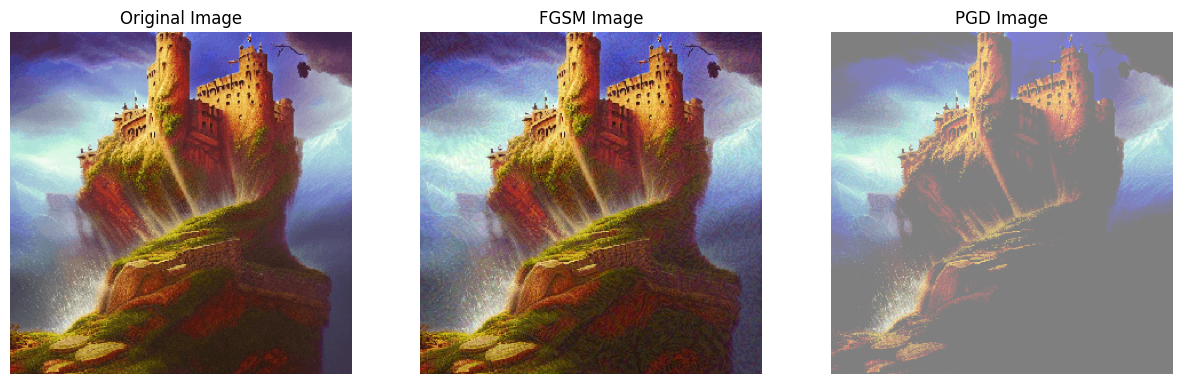

In [ ]:
# display images and predictions
print("FGSM Results:")
print('Original prediction:', original_pred)
print('FGSM prediction:', fgsm_pred)
print("\n\nPGD Results")
print('Original prediction:', original_pred)
print('PGD prediction:', pgd_pred)

pgd_img = np.squeeze(pgd_adv_img.numpy())
pgd_img = (pgd_img + 1) * 0.5
pgd_img = np.clip(pgd_img, 0, 1)

fgsm_img = np.squeeze(fgsm_adv_img.numpy())
fgsm_img = (fgsm_img + 1) * 0.5
fgsm_img = np.clip(fgsm_img, 0, 1)

import matplotlib.pyplot as plt


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('FGSM Image')
plt.imshow(fgsm_img)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('PGD Image')
plt.imshow(pgd_img)
plt.axis('off')

plt.show()




#### Original Image
| Figure | Original Prediction | Confidence
|----------|----------|----------|
| 1   | Castle  | 0.7450867 |
| 2   | Racer   |0.4240203|
| 3  | Goldfish  |0.9758458|

#### Adversarial Image

| Figure| FGSM Prediction | Confidence | PGD Prediction | Confidence
|----------|----------|----------|----------| ----------|
| 1   | Fountain  | 0.24093166 | Fountain | 0.99986076
| 2   | Amphibian   |0.42342597| Beach Wagon | 0.995327
| 3  | Tree_frog  |0.35131302| Pin_wheel | 0.99999964



Figure 1:
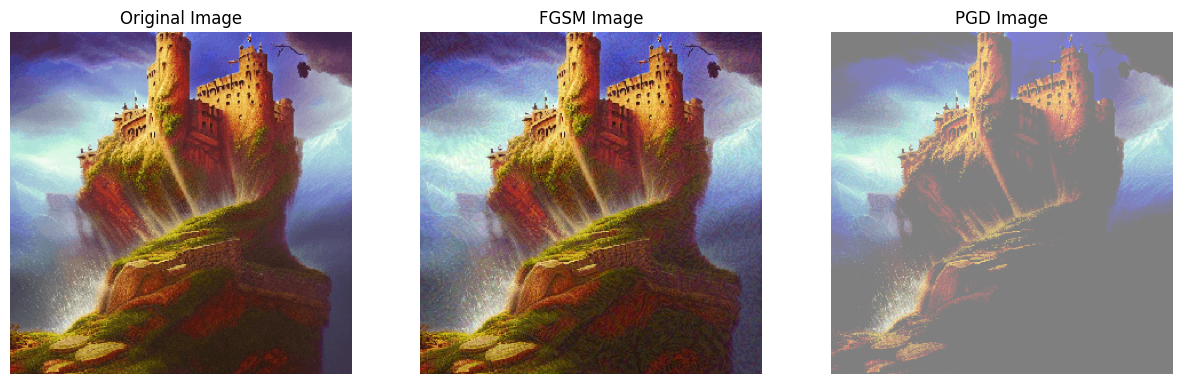

Figure 2:
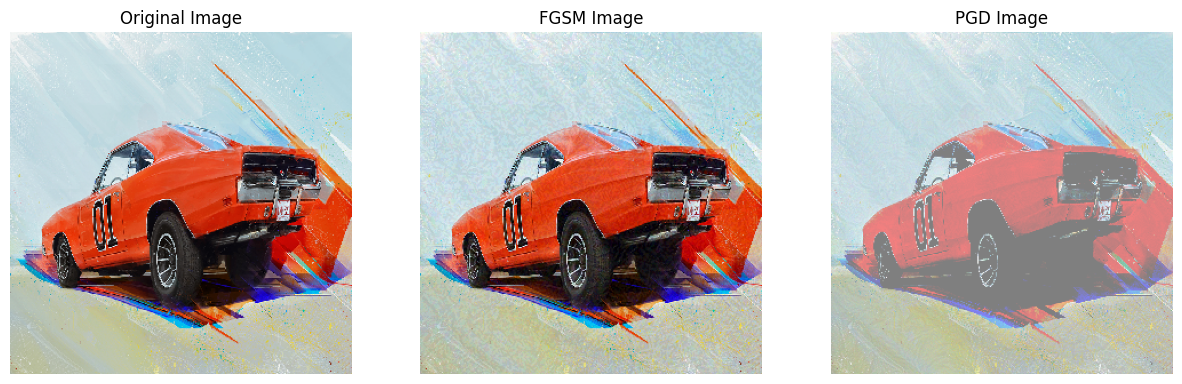
Figure 3:

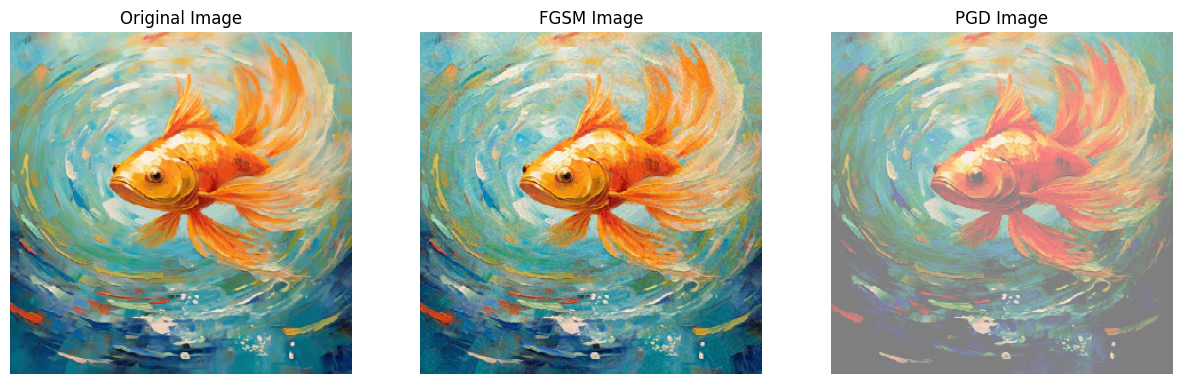


## Evaluation
The results indicate a successful manipulation of images in a way that disrupts AI recognition while maintaining artistic integrity to the human eye. Our use of matrices for image-pixel manipulation proved effective in creating significant alterations and the data clearly demonstrates the potency of adversarial attacks in manipulating AI predictions. This was further evident in the inability of generative AI tools (DALL-E) to accurately identify the altered images. For instance (PGD), a ‘racer’ originally identified with a confidence of 0.4240203 is misclassified as a ‘beach_wagon’ with a confidence of 0.995327 post-manipulation. This significant shift in classification and rate of confidence underscores the ability of adversarial techniques to effectively deceive AI models.

The FGSM method applies a single, large update to the image, effectively altering AI predictions while maintaining the original image's appearance. For example, an image of a ‘castle’ (original AI prediction confidence: 0.7450867) was altered using FGSM. Post-manipulation, the AI misidentified it as a ‘fountain’ with a confidence of 0.24093166. In contrast, the original image of a ‘castle’ (original AI prediction confidence 0.7450867) was altered using PGD. Post-manipulation, the AI misidentified it as a ‘fountain’ with a confidence of 0.99986076. PGD, an iterative approach, applies multiple, smaller updates. This method seems to be more effective in misleading AI, evident by the high confidence levels in the adversarial predictions. However, the PGD method led to a noticeable change in the image, a faded, washed out look, which affects its visual integrity to the artist and consumers.

The confidence rates between the original and adversarial images, when applying the FGSM method, seem to vary greatly compared to applying the PGD method. When using the FGSM method, the AI's confidence in identifying a 'castle' decreases from a moderately high certainty (0.7450867) to a much lower confidence (0.24093166) in its new classification as a 'fountain'. Similarly, the AI’s confidence in identifying a ‘'goldfish' decreases even more significantly from 0.9758458 to 0.35131302 in its new classification as a ‘tree_frog’. Conversely in the case of a 'racer', the AI's prediction confidence remains almost unchanged (from 0.4240203 to 0.42342597), but shifts to identifying the image as an 'amphibian'. Although there is a misinterpretation of the art itself, the confidence is generally still lower.
In contrast, the application of PGD shows a more stagnant and predictable shift in confidence levels, where one expects, based on the data, for the adversarial confidence level to be very high. The AI's prediction for a 'goldfish', initially at a high confidence of 0.9758458, drastically changes to an almost absolute certainty, 0.99999964, of it being a 'pinwheel'. Furthermore, the same pattern is observed with the 'castle' and 'racer' images, original confidence 0.7450867 and 0.4240203. The AI's confidence in its new classifications as a 'fountain' and 'beach wagon' respectively, is notably high 0.99986076 and 0.995327. A notable aspect of the differences between FGSM and PGD is observed in the consistency of confidence levels in their respective adversarial images. The adversarial images manipulated using the FGSM method tend to retain a more realistic and moderate level of confidence. In contrast, those altered by the PGD method demonstrate that the AI's predictions can be characterized by an extremely high level of confidence. These observations indicate that FGSM leads to a varied range of confidence shifts in AI predictions while PGD tends to result in a reliable high confidence in the altered classifications.

Generally applying the FGSM method results in less noticeable changes due to its one-step update approach. This method is more suitable in situations where maintaining the original appearance of the image is crucial. On the other hand the PGD method tends to produce more noticeable alterations due to its iterative nature. While more effective in deceiving AI, it may compromise the visual fidelity of the image. Therefore the choice between the FGSM and PGD method depends on the specific requirements of the application. FGSM offers a balance between effectiveness and preserving image integrity, while PGD is more suitable for scenarios where maximizing the likelihood of AI misclassification is the priority, even at the risk of more visible alterations.

These methods highlight the need for AI systems to be resilient against various types of adversarial attacks, underscoring the importance of robust AI training and development. Even though the results vary between both methods, the project's success lies in its ability to protect artistic authenticity against unauthorized AI replication, aligning with the initial objective of understanding and disrupting generative AI software used for art duplication.

Perhaps one of the biggest concerns is our inability to import thousands of images for training, as typically done with large models like DALL-E. This limitation affects the robustness and strength of the training data, potentially leading to a model that is less efficient and versatile compared to those trained with massive datasets. Another limitation that goes hand in hand would be the lack of computational power that other models use for high-performance training. Both these limitations lead to a limited dataset, where one runs the risk of bias in the model's outputs. A model trained on a non-representative sample of images might not perform well across diverse scenarios or could perpetuate biases. Therefore, we do not know whether once better trained, the models will perform differently. A way we could have attempted to mitigate this issue would be to test on more images and then further evaluate the data gathered in a much more tumultuous manner.

To refine this project, we suggest making steps towards optimizing the PGD method. By recognizing that PGD is a derivative of FGSM just done iteratively, we can focus on how the three parameters interact with each other. Locating an optimization through rigorous training, the combative AI will strengthen, eventually granular appearance will cease to corrupt the image.

## References

Ansah, H. (2023, August 24). Adversarial Attacks on Neural Networks: Exploring the Fast Gradient Sign Method. Neptune.ai. Retrieved December 14, 2023, from https://neptune.ai/blog/adversarial-attacks-on-neural-networks-exploring-the-fast-gradient-sign-method

Bajo, P. L. (2018). Adversarial Machine Learning: How to Attack and Defend ML Models. Toptal. Retrieved December 13, 2023, from https://www.toptal.com/machine-learning/adversarial-machine-learning-tutorial

CBS News Bay Area. (2023, August 31). Visual artists sue AI companies in SF federal court for repurposing their work. CBS News. Retrieved December 13, 2023, from https://www.cbsnews.com/sanfrancisco/news/ai-visual-artists-fight-back-repurposing-work-sf-federal-court/

Hardesty, L. (2017, April 14). Explained: Neural networks. MIT News. Retrieved December 13, 2023, from https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

Heikkilä, M. (2022, September 16). This artist is dominating AI-generated art. And he's not happy about it. MIT Technology Review. Retrieved December 13, 2023, from https://www.technologyreview.com/2022/09/16/1059598/this-artist-is-dominating-ai-generated-art-and-hes-not-happy-about-it/

Heikkilä, M. (2023, October 23). This new data poisoning tool lets artists fight back against generative AI. MIT Technology Review. Retrieved December 13, 2023, from https://www.technologyreview.com/2023/10/23/1082189/data-poisoning-artists-fight-generative-ai/

Ho, J., Jain, A., Abbeel, P. (2020, December) Denoising Diffusion Probabilistic Models. In Larochelle, H. (Ed.), 34th Conference on Neural Information Processing Systems (pp. 6840-6851). Curran Associates, Incorporated.

Larcher, M. (2023, March 30). Paper Explained — High-Resolution Image Synthesis with Latent Diffusion Models. Towards Data Science. Retrieved December 13, 2023, from https://towardsdatascience.com/paper-explained-high-resolution-image-synthesis-with-latent-diffusion-models-f372f7636d42

Mishkin, P., Ahmad, L., Brundage, M., Krueger, G., & Sastry, G. (2022, April 11). DALL·E 2 Preview - Risks and Limitations. GitHub. Retrieved December 13, 2023, from https://github.com/openai/dalle-2-preview/blob/main/system-card.md#model

OpenAI. (2022, June 28). DALL·E 2 pre-training mitigations. OpenAI. Retrieved December 13, 2023, from https://openai.com/research/dall-e-2-pre-training-mitigations

Rocca, J. (2019, September 23). Understanding Variational Autoencoders (VAEs). Towards Data Science. Retrieved December 13, 2023, from https://towardsdatascience.com/understanding-variational-autoencoders-vaes-f70510919f73

Shan, S., Ding, W., Passananti, J., Zheng, H., & Zhao, B. Y. (2023, October 20). Prompt-Specific Poisoning Attacks on Text-to-Image Generative Models. Arxiv. Retrieved December 14, 2023, from https://doi.org/10.48550/arXiv.2310.13828

Tomczak, J. M. (2022). Deep Generative Modeling. Springer, Cham. https://doi.org/10.1007/978-3-030-93158-2_7

Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A., Kaiser, L., Polosukhin, I. (2017, December 4). Attention is All You Need. In Luxburg, U (Ed.), 31st Annual Conference on Neural Information Processing Systems (pp. 6000-6010). Curran Associates, Incorporated.